# Example Use of paramak_build

paramak_build is a Python package that can be used to create 3D CAD models from FUSE outputs. This notebook shows how it is used. 

paramak_build uses the JSON file output of the IMAS.imas2json(dd,"<filename>.json") command. For this example, the file fpp_v1_FUSE.json has already been produced and will be used.    

First, install the package from the paramak_build repository using pip: `pip install .` Ensure that dependencies are installed as well.

Next, import the relevant functions from paramak_build, as well as the dagmc_h5m_file_inspector package.

In [1]:
import paramak_build.to_cad as to_cad
import paramak_build.run_neutronics as run_neutronics
import paramak_build.data_analysis as data_analysis
import dagmc_h5m_file_inspector as di

Next, read the geometry from the saved FUSE JSON file, and export it to the required format, as shown below. In the to_dagmc() function, when `cad=True`, CAD files in .stp format are exported. Otherwise, only a DAGMC file is generated, which is used for Monte Carlo neutronics simulations by programs such as MCNP and OpenMC.

In [2]:
json_filename = 'fpp_v1_FUSE.json'
df = to_cad.create_surfaces(json_filename)
reactor = to_cad.to_dagmc(df, cad=True)


*******************************************************************
******        Statistics on Transfer (Write)                 ******

*******************************************************************
******        Transfer Mode = 0  I.E.  As Is       ******
******        Transferring Shape, ShapeType = 0                      ******
** WorkSession : Sending all data
 Step File Name : CAD_files/reactor.stp(369301 ents)  Write  Done
assembly found
checking new shape against 22 parts
    checking shape against brep part 1
    checking shape against brep part 2
    checking shape against brep part 3
    checking shape against brep part 4
    checking shape against brep part 5
    checking shape against brep part 6
    checking shape against brep part 7
    checking shape against brep part 8
    checking shape against brep part 9
    checking shape against brep part 10
    single matching pair, brep id = 1 shape id = 1
checking new shape against 21 parts
    checking shape against brep

Info    : [ 30%] Meshing surface 1031 (Cone, MeshAdapt)
Info    : [ 30%] Meshing surface 1032 (Plane, MeshAdapt)
Info    : [ 30%] Meshing surface 1033 (Plane, MeshAdapt)
Info    : [ 30%] Meshing surface 1034 (Cone, MeshAdapt)
Info    : [ 30%] Meshing surface 1035 (Cone, MeshAdapt)
Info    : [ 30%] Meshing surface 1036 (Cone, MeshAdapt)
Info    : [ 30%] Meshing surface 1037 (Cone, MeshAdapt)
Info    : [ 30%] Meshing surface 1038 (Cone, MeshAdapt)
Info    : [ 30%] Meshing surface 1039 (Cone, MeshAdapt)
Info    : [ 30%] Meshing surface 1040 (Cone, MeshAdapt)
Info    : [ 30%] Meshing surface 1041 (Cone, MeshAdapt)
Info    : [ 30%] Meshing surface 1042 (Cone, MeshAdapt)
Info    : [ 30%] Meshing surface 1043 (Cone, MeshAdapt)
Info    : [ 30%] Meshing surface 1044 (Cone, MeshAdapt)
Info    : [ 30%] Meshing surface 1045 (Cone, MeshAdapt)
Info    : [ 30%] Meshing surface 1046 (Cone, MeshAdapt)
Info    : [ 30%] Meshing surface 1047 (Cone, MeshAdapt)
Info    : [ 30%] Meshing surface 1048 (Cone, M

You should now have 3D CAD files from your FUSE geometry, as well as a DAGMC file for running neutronics simulations! 

This process also created a pandas dataframe, which contains information about each layer present in the CAD model. 

In [17]:
import os
print(os.path.isfile("CAD_files/reactor.stp")) # Check that CAD file was created
print(os.path.isfile("dagmc.h5m"))             # Check that DAGMC file was created
df

True
True


,outline,volume,start_radius,names,end_radius,material,type,thickness,area,fs,surface,cuts
0,"{'z': [-6.078719665625916, -6.078719665625916,...",46.675588,1.317720,OH,1.719780,ReBCO,1.0,0.402060,4.891291,2.0,<paramak.parametric_shapes.rotate_straight_sha...,[<paramak.parametric_components.poloidal_field...
1,"{'z': [-3.56237858981201, -3.4980884388903775,...",513.399425,3.273722,plasma,6.375143,DT_plasma,-1.0,3.101421,17.801809,0.0,<paramak.parametric_shapes.rotate_straight_sha...,[]
2,"{'z': [4.257446765319415, 4.26690224425937, 4....",488.006561,6.375143,lfs blanket,7.158687,lithium-lead,4.0,0.783544,15.603863,-1.0,<paramak.parametric_shapes.rotate_straight_sha...,[<paramak.parametric_shapes.rotate_straight_sh...
3,"{'z': [4.258470131392006, 4.270995321372886, 4...",146.975383,7.158687,lfs high temp shield,7.365448,Tungsten,3.0,0.206761,5.013579,-1.0,<paramak.parametric_shapes.rotate_straight_sha...,[<paramak.parametric_shapes.rotate_straight_sh...
4,"{'z': [4.260281920838491, 4.278241793692562, 4...",137.618977,7.684035,lfs vacuum vessel,7.856336,"Water, Liquid",6.0,0.172301,4.592936,-1.0,<paramak.parametric_shapes.rotate_straight_sha...,[<paramak.parametric_shapes.rotate_straight_sh...
5,"{'z': [4.2627225734175695, 4.288003480620737, ...",366.781959,7.925257,lfs low temp shield,8.349447,Tungsten,3.0,0.424190,12.286020,-1.0,<paramak.parametric_shapes.rotate_straight_sha...,[<paramak.parametric_shapes.rotate_straight_sh...
6,"{'z': [-4.255153840402148, 4.263287346116625, ...",39.062373,8.508740,lfs TF,8.632128,ReBCO,2.0,0.123387,3.874448,-1.0,<paramak.parametric_shapes.extruded_straight_s...,[<paramak.parametric_shapes.rotate_straight_sh...
7,"{'z': [7.67118905666254, -7.40663972101469, -7...",254.328241,10.054327,cryostat,10.266422,"Steel, Stainless 316",7.0,0.212095,5.129932,3.0,<paramak.parametric_shapes.rotate_straight_sha...,[<paramak.parametric_shapes.rotate_straight_sh...
8,"{'z': [-4.186269096785177, -4.221370935019239,...",NaN,NaN,Lower divertor,NaN,Tungsten,8.0,NaN,NaN,NaN,<paramak.parametric_shapes.rotate_straight_sha...,[]
9,"{'z': [4.270526048104317, 4.2741676182937764, ...",NaN,NaN,Upper divertor,NaN,Tungsten,8.0,NaN,NaN,NaN,<paramak.parametric_shapes.rotate_straight_sha...,[]


Next, you can use the DAGMC file to run OpenMC. To do so, you should define the rotation angle of the geometry. This is currently set to be 360 degrees / (# of TF coils), and can be taken from the dataframe you created. 
You will also need to assign material names and numbers to each volume in your model, which are taken from the dataframe and the DAGMC file.

In [4]:
rotation_angle=df.surface[0].rotation_angle
material_tag_dict = dict(zip(df.names,df.material))
vol_number_to_cell_dict = di.get_volumes_and_materials_from_h5m('dagmc.h5m')

Next, you can set up your OpenMC input files, and run your neutronics simulation!

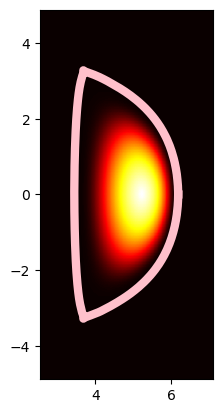

Numpy integrated neutron rate: 3.16899647006647e+20 n/s
Total Volume: 387.39676155950883 m**3
Total neutron rate: 3.1684070437151094e+20 neutrons/s
Fusion power: 894.6076498105703 MW
[3, 4]
{'OH': 'ReBCO', 'plasma': 'DT_plasma', 'lfs blanket': 'lithium-lead', 'lfs high temp shield': 'Tungsten', 'lfs vacuum vessel': 'Water, Liquid', 'lfs low temp shield': 'Tungsten', 'lfs TF': 'ReBCO', 'cryostat': 'Steel, Stainless 316', 'Lower divertor': 'Tungsten', 'Upper divertor': 'Tungsten', 'pf_coil': 'Nb3Sn'}


rm: cannot remove 'plot_settings.pkl': No such file or directory


                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

In [5]:
# set up OpenMC input xml files
settings = run_neutronics.define_openmc_settings(5000,10,json_filename, rotation_angle)
geometry = run_neutronics.define_openmc_geometry(rotation_angle)
tallies = run_neutronics.define_openmc_tallies(vol_number_to_cell_dict)
materials = run_neutronics.define_openmc_materials(material_tag_dict)
settings.export_to_xml()
geometry.export_to_xml()
tallies.export_to_xml()
materials.export_to_xml()
# run OpenMC
sp_filename = run_neutronics.run_openmc(geometry, materials, settings, tallies)

Finally, you can parse your output to extract useful quantities like the tritium breeding ratio!

In [6]:
#analyze data
component_volume_dictionary = data_analysis.get_component_volumes(reactor.shapes_and_components, rotation_angle)
print(material_tag_dict)
print(vol_number_to_cell_dict)
results=data_analysis.display_tallies(sp_filename, component_volume_dictionary, vol_number_to_cell_dict)

{'OH': 'ReBCO', 'plasma': 'DT_plasma', 'lfs blanket': 'lithium-lead', 'lfs high temp shield': 'Tungsten', 'lfs vacuum vessel': 'Water, Liquid', 'lfs low temp shield': 'Tungsten', 'lfs TF': 'ReBCO', 'cryostat': 'Steel, Stainless 316', 'Lower divertor': 'Tungsten', 'Upper divertor': 'Tungsten', 'pf_coil': 'Nb3Sn'}
{1: 'OH', 2: 'plasma', 3: 'lfs blanket', 4: 'lfs blanket', 5: 'lfs high temp shield', 6: 'lfs vacuum vessel', 7: 'lfs low temp shield', 8: 'lfs TF', 9: 'cryostat', 10: 'Lower divertor', 11: 'Upper divertor', 12: 'pf_coil', 13: 'pf_coil', 14: 'pf_coil', 15: 'pf_coil', 16: 'pf_coil', 17: 'pf_coil', 18: 'pf_coil', 19: 'pf_coil', 20: 'pf_coil', 21: 'pf_coil', 22: 'pf_coil'}
0.0


/home/mclaughlink/mambaforge/envs/neutronics/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:1784: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  result[:] = values


,Tally,Result / SP,StDevs
0,CS Coil Heating,[0.0 joule / centimeter ** 3],[0.0 joule / centimeter ** 3]
1,CS Coil Heating Local,[0.0 joule / centimeter ** 3],[0.0 joule / centimeter ** 3]
2,Blanket Heating,[8.450583538320321e-22 joule / centimeter ** 3...,[5.778814153882577e-24 joule / centimeter ** 3...
3,Blanket Heating Local,"[0.0 joule / centimeter ** 3, 0.0 joule / cent...","[0.0 joule / centimeter ** 3, 0.0 joule / cent..."
4,Blanket TBR,"[[[0.0953148082744718]], [[0.5822727651957202]]]","[[[0.0008442010539411208]], [[0.00339238041896..."
5,TBR Mesh Tally,"[[[0.0]], [[0.0]], [[0.0]], [[0.0]], [[0.0]], ...","[[[0.0]], [[0.0]], [[0.0]], [[0.0]], [[0.0]], ..."
6,Heating Mesh Tally,"[0.0 joule / centimeter ** 3, 0.0 joule / cent...","[0.0 joule / centimeter ** 3, 0.0 joule / cent..."
7,TF Coil Heating (All coils),[2.4366044525651333e-25],[1.6906015411183581e-25]
8,TF Coil Heating Local (All coils),[0.0],[0.0]


The display_tallies() function returns an openmc.Statepoint object, so from here, you can use OpenMC to extract other useful info, like the plot of nuclear heating or neutron flux.

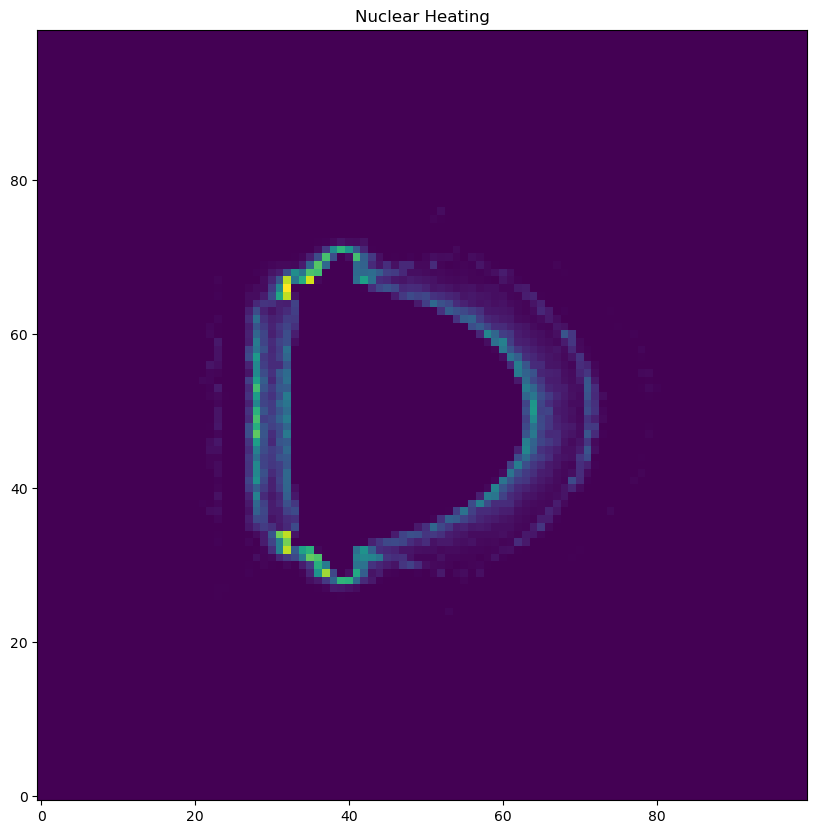

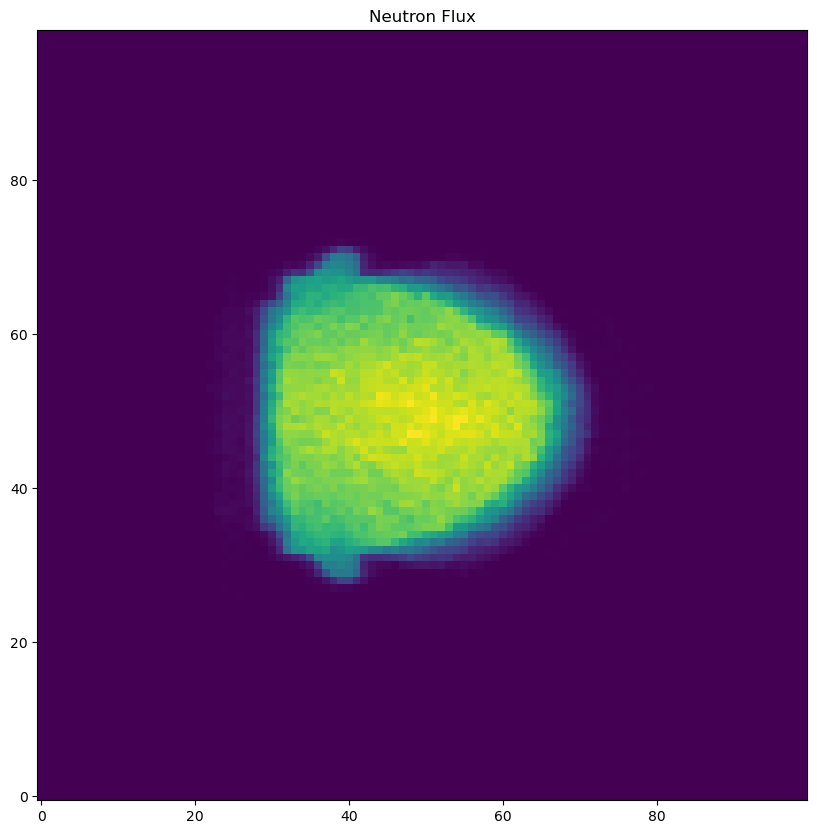

In [16]:
import matplotlib.pyplot as plt

heating_tally = results.get_tally(name="Heating Mesh Tally")
heating_mean = heating_tally.mean.reshape(100,100,100) * rotation_angle/360
plt.figure(figsize=(10,10))
plt.title("Nuclear Heating")
plt.imshow(heating_mean[:,1,:], origin="lower")

flux_tally = results.get_tally(name="Flux Mesh Tally N")
flux_mean = flux_tally.mean.reshape(100,100,100) * rotation_angle/360
plt.figure(figsize=(10,10))
plt.title("Neutron Flux")
plt.imshow(flux_mean[:,1,:], origin="lower")